## Introduction

This is an explortatory analysis of bike share dataset for a fictional company called Cyclistic. The dataset includes data for last 17 mounths ending at August 2022. 

Python programming is used.

### load library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt



## Introduction

This is an explortatory analysis of bike share dataset for a fictional company called Cyclistic. The dataset includes data for last 17 mounths ending at August 2022. 

Python programming is used.

# 1- Ask
##  A clear statement of the business task

We are looking for differences of the trends between two category of users, namely, annual members and casual riders. 


# 2- Preparation 
## Description of all data sources used

Data for past 17 mounths is downloaded from [here](https://divvy-tripdata.s3.amazonaws.com/index.html). For the purposes of this case study, it is assumed that the provided datasets are credible. The data has been made available by Motivate International Inc. under this [lisence](https://ride.divvybikes.com/data-license-agreement).

The data for each mounth is a separate comma-separated values (CSV).

## Import the data

In [2]:
# Importing the datasets into tripdata_dict dictionary
# list of non-standard missing values
missing_values = ["n/a", "na", "--"]
tripdata_dict = {}
for dirname, _, filenames in os.walk('./Bike_Share_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if filename != '.DS_Store':
            tripdata_dict[filename[:6]] = pd.read_csv(os.path.join(dirname, filename), na_values = missing_values)

print (tripdata_dict.keys())
print ('')
print ('There are ride data of '+ str(len(tripdata_dict.keys())) + ' months, ending at ' + max(list(tripdata_dict.keys()))  )


./Bike_Share_data/202205-divvy-tripdata.csv
./Bike_Share_data/202109-divvy-tripdata.csv
./Bike_Share_data/202104-divvy-tripdata.csv
./Bike_Share_data/.DS_Store
./Bike_Share_data/202107-divvy-tripdata.csv
./Bike_Share_data/202206-divvy-tripdata.csv
./Bike_Share_data/202111-divvy-tripdata.csv
./Bike_Share_data/202112-divvy-tripdata.csv
./Bike_Share_data/202203-divvy-tripdata.csv
./Bike_Share_data/202103-divvy-tripdata.csv
./Bike_Share_data/202202-divvy-tripdata.csv
./Bike_Share_data/202201-divvy-tripdata.csv
./Bike_Share_data/202110-divvy-tripdata.csv
./Bike_Share_data/202106-divvy-tripdata.csv
./Bike_Share_data/202207-divvy-tripdata.csv
./Bike_Share_data/202204-divvy-tripdata.csv
./Bike_Share_data/202108-divvy-tripdata.csv
./Bike_Share_data/202105-divvy-tripdata.csv
dict_keys(['202205', '202109', '202104', '202107', '202206', '202111', '202112', '202203', '202103', '202202', '202201', '202110', '202106', '202207', '202204', '202108', '202105'])

There are ride data of 17 months, ending 

## Merging the data into trips dataframe

In [3]:
# Merging the datasets
all_df = []
for key, value in tripdata_dict.items():
    all_df.append(value)
# tripdata_dict.clear()

trips = pd.concat(all_df)
print(type(trips))

# check the shape and info of trips dataframe
print(trips.shape)

# What are the features? 
trips.info(show_counts=True)

trips.head()

<class 'pandas.core.frame.DataFrame'>
(8550827, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8550827 entries, 0 to 531632
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             8550827 non-null  object 
 1   rideable_type       8550827 non-null  object 
 2   started_at          8550827 non-null  object 
 3   ended_at            8550827 non-null  object 
 4   start_station_name  7428037 non-null  object 
 5   start_station_id    7428040 non-null  object 
 6   end_station_name    7348291 non-null  object 
 7   end_station_id      7348291 non-null  object 
 8   start_lat           8550827 non-null  float64
 9   start_lng           8550827 non-null  float64
 10  end_lat             8542903 non-null  float64
 11  end_lng             8542903 non-null  float64
 12  member_casual       8550827 non-null  object 
dtypes: float64(4), object(9)
memory usage: 913.3+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member


There are 8550827 rows and 13 columns. Columns header are 'ride_id', 'rideable_type', 'member_casual', start time and end time in addition to name and coordinate of the start and end stations.  

There are missing data in the station name and id columns. 

# 3- Process
## Document any cleaning or manipulation of data
The following questions are going to be answered.

What are the expected types (int, float, string, boolean)?
Is there obvious missing data (values that Pandas can detect)?
Is there other types of missing data that’s not so obvious (can’t easily detect with Pandas)?
To check the third question, we have used 'na_values = missing_values' while reading the csv files.

## Check Null values


In [4]:
total = trips.isnull().sum().sort_values(ascending=False)
percent = (trips.isnull().sum()/trips.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
end_station_name,1202536,0.140634
end_station_id,1202536,0.140634
start_station_name,1122790,0.131308
start_station_id,1122787,0.131307
end_lat,7924,0.000927
end_lng,7924,0.000927
ride_id,0,0.000000
rideable_type,0,0.000000
started_at,0,0.000000
ended_at,0,0.000000


## Handling the missing values
We have two options regarding the missing values. Either we'll delete all the variables with missing data, or we'll just delete the observation with missing data. 

The advantage of first approach is that we are keeping all examples (rows) no matter there are some missing values in the removed variables.

On the other hand, the second approach has the advantage of keeping all the variables even if they have some missing values by just removing all the rows of the all varibales if some varibale are missing. 

For now, we create a copy of trips dataframe in which the first option is implemented, called trips_1. Another copy is kept in which the observation with missing data are removed, called trips_2.

In [5]:
trips_1 = trips
print(trips.shape)
print(trips_1.shape)

trips_1 = trips_1.drop((missing_data[missing_data['Total'] > 0]).index, 1)
print(trips.shape)
print(trips_1.shape)

trips_1.drop(columns = ['start_lat','start_lng'], axis=1, inplace=True)


trips_1.info(show_counts=True)
print (trips.shape, trips_1.shape)

# remove trips
# del trips

# print ("")
# print("check trips_2")
# trips_2 = trips
# trips_2 = trips_2.dropna()
# trips_2.info(show_counts=True)
# print (trips.shape, trips_2.shape)


(8550827, 13)
(8550827, 13)


/var/folders/h5/8yxp_kmx1wn66zrygjd28qcw0000gn/T/ipykernel_5252/546056534.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trips_1 = trips_1.drop((missing_data[missing_data['Total'] > 0]).index, 1)


(8550827, 13)
(8550827, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8550827 entries, 0 to 531632
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ride_id        8550827 non-null  object
 1   rideable_type  8550827 non-null  object
 2   started_at     8550827 non-null  object
 3   ended_at       8550827 non-null  object
 4   member_casual  8550827 non-null  object
dtypes: object(5)
memory usage: 391.4+ MB
(8550827, 13) (8550827, 5)


## Check for duplicate

In [6]:
# # check for duplicate

trips_1[trips_1['ride_id'].duplicated()]


# trip_dup = trips_2.copy()

# # Checking for duplicates and dropping the entire duplicate row if any
# trip_dup.drop_duplicates(subset=None, inplace=True)
# print(trip_dup.shape)

,ride_id,rideable_type,started_at,ended_at,member_casual


Since the size of the trips_2 and trip_dup are same, there are no duplicate examples.

## Data transformation and cleaning 

1- started_at and ended_at columns have object datatype. They should be converted to datetime.

2- We'll convert data types of 'rideable_type' and 'member_casual' from str to categorical, and check for their possible values.


In [7]:
trips_1["start_time"] = pd.to_datetime(trips_1["started_at"])
trips_1["end_time"] = pd.to_datetime(trips_1["ended_at"])

trips_1.drop(columns = ['started_at','ended_at'], axis=1, inplace=True)

# instead of above code, we could just use .rename() method as shown below
# trips_1.rename(columns={'started_at':'start_time', 'ended_at':'end_time'},  inplace=True)


trips_1['rideable_type'] = trips_1['rideable_type'].astype('category')
trips_1['member_casual'] = trips_1['member_casual'].astype('category')

trips_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8550827 entries, 0 to 531632
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  category      
 2   member_casual  category      
 3   start_time     datetime64[ns]
 4   end_time       datetime64[ns]
dtypes: category(2), datetime64[ns](2), object(1)
memory usage: 277.3+ MB


In [8]:
trips_1['member_casual'].cat.categories

Index(['casual', 'member'], dtype='object')

In [9]:
trips_1['rideable_type'].cat.categories

Index(['classic_bike', 'docked_bike', 'electric_bike'], dtype='object')

## Create 'ride_length' and 'day_of_week' columns

(array([8.549953e+06, 3.490000e+02, 3.120000e+02, 9.200000e+01,
        5.400000e+01, 3.400000e+01, 1.800000e+01, 8.000000e+00,
        3.000000e+00, 4.000000e+00]),
 array([ -137. ,  5471.1, 11079.2, 16687.3, 22295.4, 27903.5, 33511.6,
        39119.7, 44727.8, 50335.9, 55944. ]),
 <BarContainer object of 10 artists>)

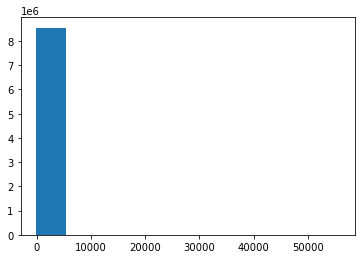

In [10]:
# create rid_length in minutes
trips_1['ride_length'] = (trips_1['end_time'] - trips_1['start_time'])/pd.Timedelta(minutes=1)
trips_1['ride_length'] = trips_1['ride_length'].astype('int32')
trips_1['ride_length']

plt.hist(trips_1['ride_length'])

## Check for irrational rides (rows)

In [11]:
# Apparently, there are some examples with negative ride_length
# trips_1[trips_1['ride_length']<0].count()

trips_1[trips_1['ride_length']>120].count()

ride_id          91215
rideable_type    91215
member_casual    91215
start_time       91215
end_time         91215
ride_length      91215
dtype: int64

There are 99 examples with negative ride_length.
Also, there are 145276 examples with less than 1 minute duration. Assuming the 1 minute as a threshold for reasonable trip, we'll just keep the trips had ride_length greater than 1 min.

There are also examples with more than 120 minutes of ride_length which is equal to 2 hours. It is assumed that these examples are not correct. Therefore, we'll delete these examples.

In [12]:
print (trips_1.shape)
trips_1 = trips_1[trips_1['ride_length']>=1]
print (trips_1.shape)

trips_1 = trips_1[trips_1['ride_length']<=120]
print (trips_1.shape)

###### Another approach to delete these rows-->
# index_num = trips_1[trips_1['ride_length']<1].index
# trips_1 = trips_1.drop(index_num)

(8550827, 6)
(8405551, 6)
(8314336, 6)


(array([4564196., 2177423.,  825661.,  338807.,  155993.,   93884.,
          62288.,   43365.,   30629.,   22090.]),
 array([  1. ,  12.9,  24.8,  36.7,  48.6,  60.5,  72.4,  84.3,  96.2,
        108.1, 120. ]),
 <BarContainer object of 10 artists>)

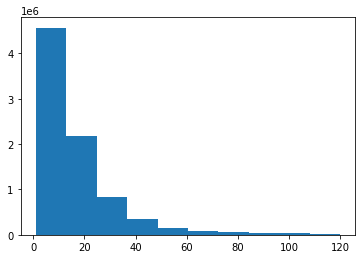

In [13]:
plt.hist(trips_1['ride_length'])

In [14]:
# create column for time the trip started
trips_1['hour'] = trips_1['start_time'].dt.strftime('%H')

# create column for day of the week the trip started
trips_1['day_of_the_week'] = trips_1['start_time'].dt.day_name()

# create column for month when the trip started
trips_1['month'] = trips_1['start_time'].dt.month_name()

# create column for year when the trip started
trips_1['year'] = trips_1['start_time'].dt.year

#### two ways to assign a data type to categorical
trips_1['hour'] = trips_1['hour'].astype('category')
trips_1['year'] = trips_1['year'].astype('category')


trips_1['month'] = pd.Categorical(trips_1['month'], categories=
    ['January','February','March','April','May','June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True)

trips_1['day_of_the_week'] = pd.Categorical(trips_1['day_of_the_week'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

In [15]:
trips_1.head()


,ride_id,rideable_type,member_casual,start_time,end_time,ride_length,hour,day_of_the_week,month,year
0,EC2DE40644C6B0F4,classic_bike,member,2022-05-23 23:06:58,2022-05-23 23:40:19,33,23,Monday,May,2022
1,1C31AD03897EE385,classic_bike,member,2022-05-11 08:53:28,2022-05-11 09:31:22,37,08,Wednesday,May,2022
2,1542FBEC830415CF,classic_bike,member,2022-05-26 18:36:28,2022-05-26 18:58:18,21,18,Thursday,May,2022
3,6FF59852924528F8,classic_bike,member,2022-05-10 07:30:07,2022-05-10 07:38:49,8,07,Tuesday,May,2022
4,483C52CAAE12E3AC,classic_bike,member,2022-05-10 17:31:56,2022-05-10 17:36:57,5,17,Tuesday,May,2022


In [16]:
trips_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8314336 entries, 0 to 531632
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ride_id          object        
 1   rideable_type    category      
 2   member_casual    category      
 3   start_time       datetime64[ns]
 4   end_time         datetime64[ns]
 5   ride_length      int32         
 6   hour             category      
 7   day_of_the_week  category      
 8   month            category      
 9   year             category      
dtypes: category(6), datetime64[ns](2), int32(1), object(1)
memory usage: 333.0+ MB


Create a csv file of the clean data.

In [17]:
trips_1.to_csv('trips_1.csv',index=False,header=True)

# 4- Analyze
## Perform calculations and aggregate data to identify trends

In [18]:
trips_1.describe()

,ride_length
count,8.314336e+06
mean,1.640077e+01
std,1.638940e+01
min,1.000000e+00
25%,6.000000e+00
50%,1.100000e+01
75%,2.000000e+01
max,1.200000e+02


#### The only quantitative variable is ride_length for which descriptive statistics is shown above. As seen, the average ride length is 16 minutes. The min and max are, respectively 1 and 120 minutes same as the threshold that we chose when cleaning the dataset.

#### Next, we will group the available data by their riders type (field name: 'member_casual') to see the difference in the total number of rides, total ride length and average ride length by these two groups.

In [19]:
trip_by_member = pd.pivot_table(trips_1,
              index = 'member_casual',
              values = 'ride_id',
              aggfunc = ['count'],
              margins = False,
              margins_name = 'Total Count')
print(trip_by_member)

# Another approach to count the rides for different customer types is as follows:
pd.DataFrame(trips_1['member_casual'].value_counts()).rename(columns={'member_casual':'No. of rides'})


                 count
               ride_id
member_casual         
casual         3671643
member         4642693


,No. of rides
member,4642693
casual,3671643


In [20]:
ride_len_by_member = pd.pivot_table(trips_1,
              index = 'member_casual',
              values = 'ride_length',
              aggfunc = ['count' ,np.sum, np.mean],
              margins = False,
              margins_name = 'Total Count')
print(ride_len_by_member)
print('')
# Another approach to obtain sum of the ride_length is as follows:
print('Total Duration Time (Members) : ' + str(int(trips_1.loc[trips_1['member_casual'] == 'member', 'ride_length'].sum())) + ' Minutes')

print('ratio of member to casual riders (total ride number):' , ride_len_by_member.loc['member','count'].ride_length/ ride_len_by_member.loc['casual','count'].ride_length) 
print('ratio of member to casual riders (total ride length):' , ride_len_by_member.loc['member','sum'].ride_length/ ride_len_by_member.loc['casual','sum'].ride_length) 



                    count         sum        mean
              ride_length ride_length ride_length
member_casual                                    
casual            3671643    79063305   21.533495
member            4642693    57298175   12.341582

Total Duration Time (Members) : 57298175 Minutes
ratio of member to casual riders (total ride number): 1.264472880397141
ratio of member to casual riders (total ride length): 0.7247126211078578


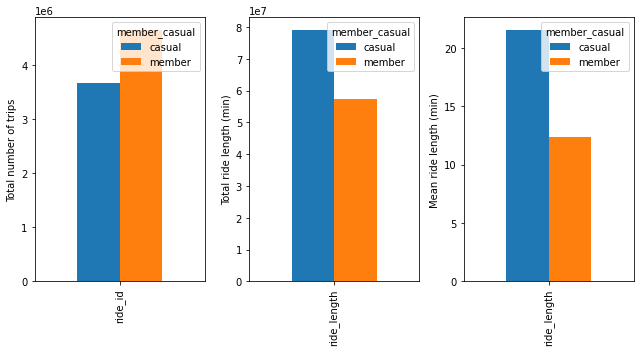

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
trip_by_member['count'].T.plot(kind='bar', ylabel='Total number of trips', figsize= (9,5), ax=ax1)
ride_len_by_member['sum'].T.plot(kind='bar', ylabel='Total ride length (min)', figsize= (9,5), ax=ax2)
ride_len_by_member['mean'].T.plot(kind='bar', ylabel='Mean ride length (min)', figsize= (9,5), ax=ax3)
fig.tight_layout()

#### It is seen from above table that while members have riden the bikes 26% more, their total ride time is 28% lower than the casual members.


 



In [23]:
# The same result can be obtained by groupby method instead of pivot_table
tr_by_year_month_mem = trips_1.groupby(['member_casual'], as_index=False)
tr_by_year_month_mem['ride_length'].sum()


,member_casual,ride_length
0,casual,79063305
1,member,57298175


## Group by ride type

In [24]:
ride_len_by_mem_per_type = pd.pivot_table(trips_1,
              index = ['member_casual' ],
              values = 'ride_length',
              columns= 'rideable_type',                    
              aggfunc = [np.sum, np.mean],
              margins = False,
              margins_name = 'Total Count')
ride_len_by_mem_per_type

sum                                   mean              \
rideable_type classic_bike docked_bike electric_bike classic_bike docked_bike   
member_casual                                                                   
casual            38208020    13238304      27616981    21.907728   34.567109   
member            36105853           0      21192322    12.791696         NaN   

                             
rideable_type electric_bike  
member_casual                
casual            17.879397  
member            11.643544

In [25]:
print('ratio of number of ride for docked bikes to total number of rides by casual users')
print (trips_1[(trips_1['rideable_type'] == 'docked_bike') & (trips_1['member_casual'] == 'casual')]['ride_id'].count() /trips_1['member_casual'].value_counts().casual)

print('ratio of number of ride for docked bikes to total number of rides by members')
print (trips_1[(trips_1['rideable_type'] == 'docked_bike') & (trips_1['member_casual'] == 'member')]['ride_id'].count() /trips_1['member_casual'].value_counts().member)


ratio of number of ride for docked bikes to total number of rides by casual users
0.10430589248464515
ratio of number of ride for docked bikes to total number of rides by members
0.0


#### It seems that the docked bikes are not available for members. Therefore, it would be more insightful if we make a comparison of the customers ride pattern while focusing at the data in which the docked bikes are removed.

# Remove docked bike

In [26]:
trips_2 = trips_1[trips_1['rideable_type'] != 'docked_bike']
# trips_2.info()
trips_2['member_casual'].value_counts()


member    4642693
casual    3288669
Name: member_casual, dtype: int64

In [27]:
trips_2['rideable_type'].value_counts()
trips_2['rideable_type']= trips_2['rideable_type'].cat.remove_unused_categories()
trips_2['rideable_type'].value_counts()



/var/folders/h5/8yxp_kmx1wn66zrygjd28qcw0000gn/T/ipykernel_5252/880071432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_2['rideable_type']= trips_2['rideable_type'].cat.remove_unused_categories()


classic_bike     4566644
electric_bike    3364718
Name: rideable_type, dtype: int64

In [28]:
a = trips_2['member_casual'].value_counts()
print(a.casual)

3288669


In [29]:
ride_len_by_member2 = pd.pivot_table(trips_2,
              index = 'member_casual',
              values = 'ride_length',
              aggfunc = ['count', np.sum, np.mean],
              margins = False,
              margins_name = 'Total Count')
print(ride_len_by_member2)

print('ratio of member to casual riders (total ride number):' , ride_len_by_member2.loc['member','count'].ride_length/ ride_len_by_member2.loc['casual','count'].ride_length) 
print('ratio of member to casual riders (total ride length):' , ride_len_by_member2.loc['member','sum'].ride_length/ ride_len_by_member2.loc['casual','sum'].ride_length) 
print('ratio of casual to member riders (total ride length):' , ride_len_by_member2.loc['casual','mean'].ride_length/ ride_len_by_member2.loc['member','mean'].ride_length) 


                    count         sum        mean
              ride_length ride_length ride_length
member_casual                                    
casual            3288669    65825001   20.015697
member            4642693    57298175   12.341582
ratio of member to casual riders (total ride number): 1.4117240135750968
ratio of member to casual riders (total ride length): 0.8704621971824961
ratio of casual to member riders (total ride length): 1.6218096755316336


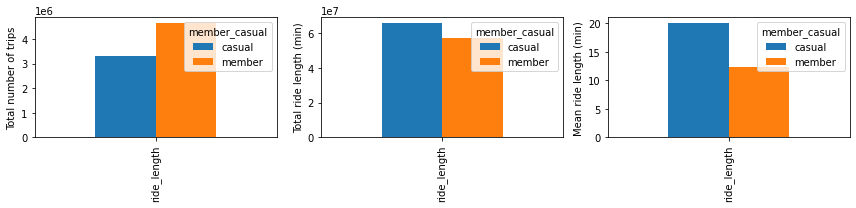

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ride_len_by_member2['count'].T.plot(kind='bar', ylabel='Total number of trips', figsize= (12,3), ax=ax1)
ride_len_by_member2['sum'].T.plot(kind='bar', ylabel='Total ride length (min)', figsize= (12,3), ax=ax2)
ride_len_by_member2['mean'].T.plot(kind='bar', ylabel='Mean ride length (min)', figsize= (12,3), ax=ax3)
fig.tight_layout()

#### Following the removal of the docked bike, as expected the total number of rides by members is much more higher than that of the casual users (about 41%). Nevertheless, the total ride length by members is 13% lower than casual users.
#### Also, the average duration of each ride of casual users is 62% higher than members.


# 5- Share
##  Visualizations and key findings



##
## Group by ride type

In [32]:
ride_len_by_mem_per_type2 = pd.pivot_table(trips_2,
              index = ['member_casual' ],
              values = 'ride_length',
              columns= 'rideable_type',                    
              aggfunc = [np.sum, np.mean],
              margins = False,
              margins_name = 'Total Count')
ride_len_by_mem_per_type2

sum                       mean              
rideable_type classic_bike electric_bike classic_bike electric_bike
member_casual                                                      
casual            38208020      27616981    21.907728     17.879397
member            36105853      21192322    12.791696     11.643544

ratio of casual to member riders (total ride length, classic bike): 1.0582223330937508
ratio of casual to member riders (total ride length, electric bike): 1.3031597481389723

ratio of casual to member riders (avg ride length, classic bike): 1.712652391949484
ratio of casual to member riders (avg ride length, electric bike): 1.5355630633627548


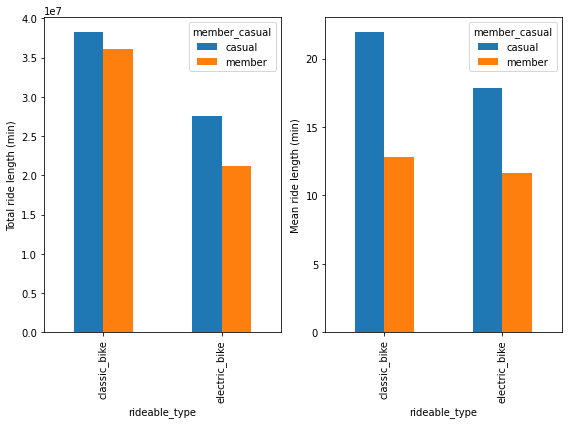

In [33]:
print('ratio of casual to member riders (total ride length, classic bike):' , ride_len_by_mem_per_type2.loc['casual','sum'].classic_bike/ ride_len_by_mem_per_type2.loc['member','sum'].classic_bike) 
print('ratio of casual to member riders (total ride length, electric bike):' , ride_len_by_mem_per_type2.loc['casual','sum'].electric_bike/ ride_len_by_mem_per_type2.loc['member','sum'].electric_bike) 
print ('')
print('ratio of casual to member riders (avg ride length, classic bike):' , ride_len_by_mem_per_type2.loc['casual','mean'].classic_bike/ ride_len_by_mem_per_type2.loc['member','mean'].classic_bike) 
print('ratio of casual to member riders (avg ride length, electric bike):' , ride_len_by_mem_per_type2.loc['casual','mean'].electric_bike/ ride_len_by_mem_per_type2.loc['member','mean'].electric_bike) 




fig, (ax1, ax2) = plt.subplots(1,2)


ride_len_by_mem_per_type2['sum'].T.plot(kind='bar', ylabel='Total ride length (min)', figsize= (8,6), ax = ax1)

ride_len_by_mem_per_type2['mean'].T.plot(kind='bar', ylabel='Mean ride length (min)', figsize= (8,6), ax = ax2)

fig.tight_layout()

#### As seen above, the difference of the total ride length between two groups of users is more pronounced when studying just electric bikes (30%) relative to classic bikes (6%). 

#### On the other hand, the difference of the average ride length between two groups of users is less pronounced when studying just electric bikes (53%) relative to classic bikes (72%).



##

## Group by Month

In [34]:
ride_len_by_mem_per_month2 = pd.pivot_table(trips_2,
              index = ['member_casual' ],
              values = 'ride_length',
              aggfunc = [np.sum, np.mean],
              columns = ['year', 'month'],
              margins = False,
              margins_name = 'Total Count')
ride_len_by_mem_per_month2

sum                                                        \
year             2021                                                         
month         January February    March    April      May     June     July   
member_casual                                                                 
casual              0        0  1547726  2468553  4817416  6757626  7867541   
member              0        0  1854994  2666423  3651760  4760559  4946277   

                                           ...       mean             \
year                                       ...       2021              
month           August September  October  ...    October   November   
member_casual                              ...                         
casual         7398358   6390219  4131155  ...  18.075972  15.099501   
member         5029677   4882215  4191963  ...  11.430340  10.235524   

                                                                      \
year                           2022                                    
month           December    January   February      March      April   
member_casual                                                          
casual         14.566186  13.463249  14.738526  19.221692  18.526569   
member         10.082338   9.903349  10.093575  10.850246  10.661155   

                                                
year                                            
month                May       June       July  
member_casual                                   
casual         20.297377  18.843394  18.820812  
member         12.468933  12.958881  12.887148  

[2 rows x 41 columns]

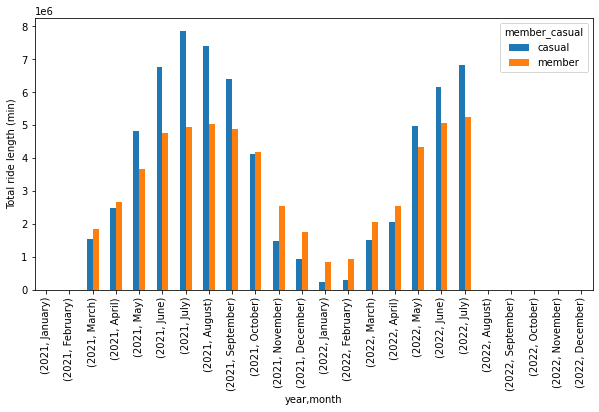

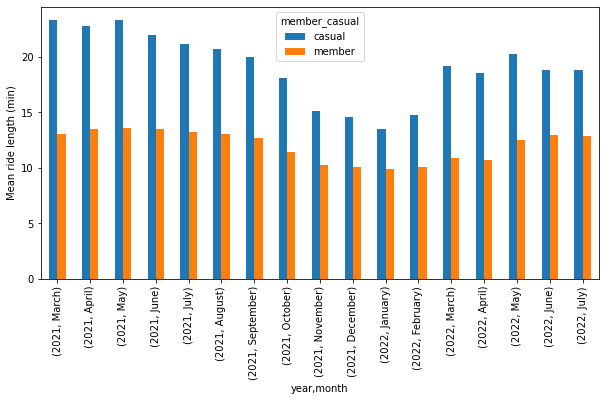

In [35]:
ax1 = ride_len_by_mem_per_month2['sum'].T.plot(kind='bar', ylabel='Total ride length (min)', figsize= (10,5))

ax2 = ride_len_by_mem_per_month2['mean'].T.plot(kind='bar', ylabel='Mean ride length (min)', figsize= (10,5))


#### It seems that four month of June, July, Agust, and September are the busiest time of the year for both users. As weather starts to cool, the total duration of the ride decreases for both users, and the least busy month coincide with the coldest month of the year, namely, January and Febuary.

#### The seasonal variation is more obvious for the casual users. In other words, casual users have extremely high and low ride duration, respectively, in the peak and off-season.

#### The total ride length for the casual users outpaces that of the members during the May, June, July, Agust which is the high season.

#### From the comparison of the data for five month for which we have data for both 2021 and 2022, it seems that the total and average ride length of the casual users at 2022 have decreased with respect to 2021.

#### Average ride length for the casual users is higher than the members year around. However, this difference is higher during the high season. 




##
## Group by Day of week

In [36]:
ride_len_by_mem_per_day2 = pd.pivot_table(trips_2,
              index = [ 'member_casual' ],
              values = 'ride_length',
              aggfunc = [np.sum, np.mean, 'count'],
              columns = 'day_of_the_week',
              margins = False,
              margins_name = 'Total Count')
ride_len_by_mem_per_day2

sum                                                 \
day_of_the_week   Monday  Tuesday Wednesday Thursday   Friday  Saturday   
member_casual                                                             
casual           7797950  6637880   6611434  7143504  8720701  15193275   
member           7696851  8256428   8340811  8225357  7859954   8867479   

                                mean                        ...             \
day_of_the_week    Sunday     Monday    Tuesday  Wednesday  ...     Friday   
member_casual                                               ...              
casual           13720257  20.394795  18.135590  17.708597  ...  18.729988   
member            8051295  11.987296  11.591093  11.671003  ...  12.002697   

                                        count                             \
day_of_the_week   Saturday     Sunday  Monday Tuesday Wednesday Thursday   
member_casual                                                              
casual           21.877164  22.770964  382350  366014    373346   404344   
member           13.823879  14.008635  642084  712308    714661   702592   

                                          
day_of_the_week  Friday Saturday  Sunday  
member_casual                             
casual           465601   694481  602533  
member           654849   641461  574738  

[2 rows x 21 columns]

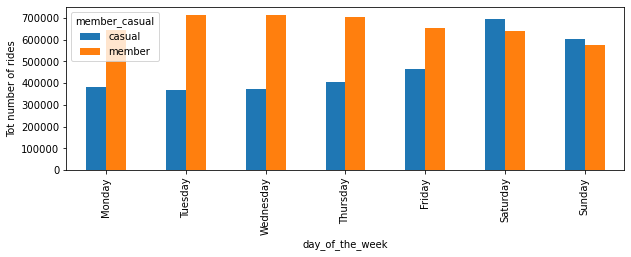

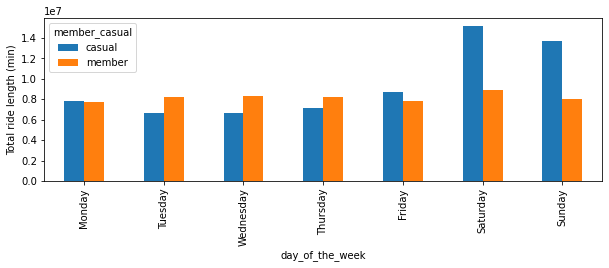

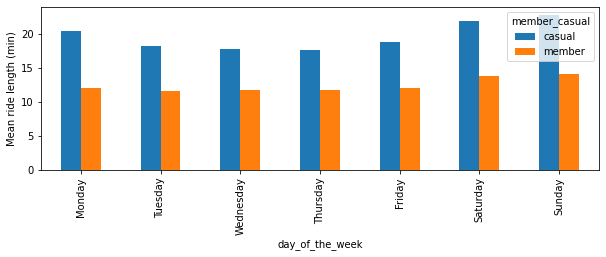

In [37]:
ax1 = ride_len_by_mem_per_day2['count'].T.plot(kind='bar', ylabel='Tot number of rides', figsize= (10,3))

ax2 = ride_len_by_mem_per_day2['sum'].T.plot(kind='bar', ylabel='Total ride length (min)', figsize= (10,3))

ax3 = ride_len_by_mem_per_day2['mean'].T.plot(kind='bar', ylabel='Mean ride length (min)', figsize= (10,3))



#### Total number of rides and total duration of the rides for member users are more uniform within the days of the week in comparison to the casual users which tend to use the service mostly on Friday nights and weekends.

#### Total duration of the rides per casual users makes up more than 60% of the total rides' duration in the weekend.

#### Generally, average ride length for the casual users is higher than members. The average ride length of casual riders on Saturday, Sunday, and Monday is higher than rest of the week days. 



##
## Group by day of the week and ride type

In [38]:
ride_len_by_mem_type_per_day2 = pd.pivot_table(trips_2,
              index = [ 'member_casual', 'rideable_type' ],
              values = 'ride_length',
              aggfunc = [np.sum, np.mean, 'count'],
              columns = 'day_of_the_week',
              margins = False,
              margins_name = 'Total Count')
ride_len_by_mem_type_per_day2

sum                                       \
day_of_the_week               Monday  Tuesday Wednesday Thursday   Friday   
member_casual rideable_type                                                 
casual        classic_bike   4378476  3549491   3529566  3842381  4842707   
              electric_bike  3419474  3088389   3081868  3301123  3877994   
member        classic_bike   4888253  5188611   5229612  5070811  4810018   
              electric_bike  2808598  3067817   3111199  3154546  3049936   

                                                    mean             \
day_of_the_week             Saturday   Sunday     Monday    Tuesday   
member_casual rideable_type                                           
casual        classic_bike   9543985  8521414  22.522909  19.989700   
              electric_bike  5649290  5198843  18.193627  16.388548   
member        classic_bike   5685221  5233327  12.441532  12.020273   
              electric_bike  3182258  2817968  11.271091  10.930997   

                                        ...                                   \
day_of_the_week              Wednesday  ...     Friday   Saturday     Sunday   
member_casual rideable_type             ...                                    
casual        classic_bike   19.395884  ...  20.394381  23.526533  24.502312   
              electric_bike  16.104154  ...  16.997712  19.560441  20.407387   
member        classic_bike   12.065922  ...  12.384888  14.297551  14.554606   
              electric_bike  11.062395  ...  11.445658  13.051402  13.096290   

                              count                                     \
day_of_the_week              Monday Tuesday Wednesday Thursday  Friday   
member_casual rideable_type                                              
casual        classic_bike   194401  177566    181975   199199  237453   
              electric_bike  187949  188448    191371   205145  228148   
member        classic_bike   392898  431655    433420   419049  388378   
              electric_bike  249186  280653    281241   283543  266471   

                                              
day_of_the_week             Saturday  Sunday  
member_casual rideable_type                   
casual        classic_bike    405669  347780  
              electric_bike   288812  254753  
member        classic_bike    397636  359565  
              electric_bike   243825  215173  

[4 rows x 21 columns]

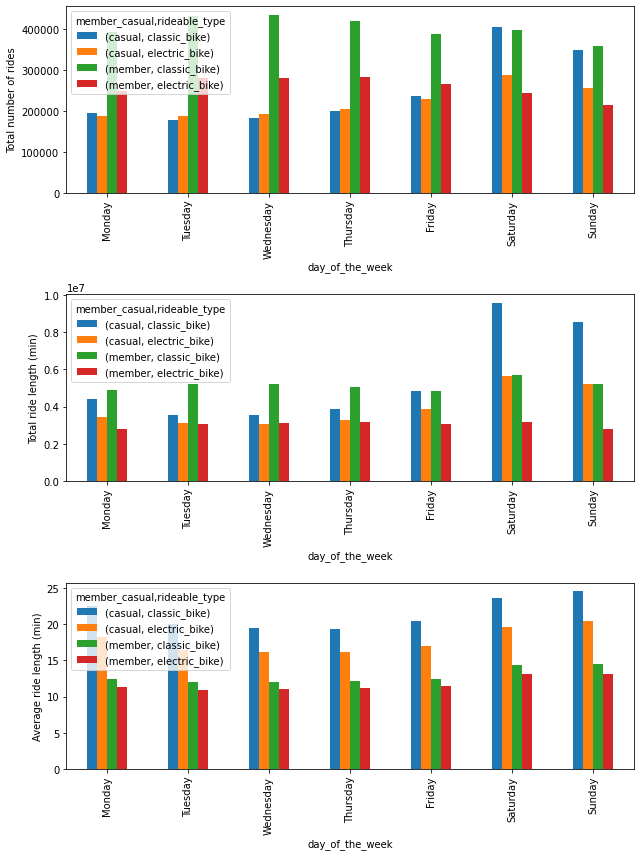

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ride_len_by_mem_type_per_day2['count'].T.plot(kind='bar', ylabel='Total number of rides', figsize= (9,12), ax = ax1)
ride_len_by_mem_type_per_day2['sum'].T.plot(kind='bar', ylabel='Total ride length (min)', figsize= (9,12), ax = ax2)
ride_len_by_mem_type_per_day2['mean'].T.plot(kind='bar', ylabel='Average ride length (min)', figsize= (9,12), ax = ax3)
fig.tight_layout()

#### The increase of the ride demand on weekends is mostly due to casual users riding classic bikes. Accordingly, total ride length for the classic bikes puts extreme pressure on the availability of the classic bikes on weekends. This stems from both large number of ride demand and higher average of ride time for this category, namely, casual users riding classic bikes on weekends.

#### While total ride length of the electric bikes is slightly less intensified on weekends in comparison to classic bikes, their total ride length by casual users is significantly larger than members (almost twice). 

#### Therefore, with the current pattern the utility of both bikes is maximized on weekends.

#### Overall, the utility of electric bike is slightly better distributed between the days of the week in comparison to the classic bikes.


##
## Group by hours of a day

In [40]:
ride_len_by_mem_per_hour2 = pd.pivot_table(trips_2,
              index = [ 'member_casual' ],
              values = 'ride_length',
              aggfunc = [np.sum, np.mean, 'count'],
              columns = ['hour'],
              margins = False,
              margins_name = 'Total Count')
ride_len_by_mem_per_hour2

sum                                                   \
hour                00      01      02      03      04      05       06   
member_casual                                                             
casual         1196998  829509  536696  295916  197036  246468   498232   
member          580284  375661  218030  129288  142388  474140  1364991   

                                          ...   count                          \
hour                07       08       09  ...      14      15      16      17   
member_casual                             ...                                   
casual          931554  1392859  1886442  ...  224185  242400  270029  314311   
member         2621433  2975427  2246887  ...  259593  301630  394206  486208   

                                                              
hour               18      19      20      21      22     23  
member_casual                                                 
casual         285923  222167  163767  138382  127008  96189  
member         407798  294730  204081  153528  117229  79427  

[2 rows x 72 columns]

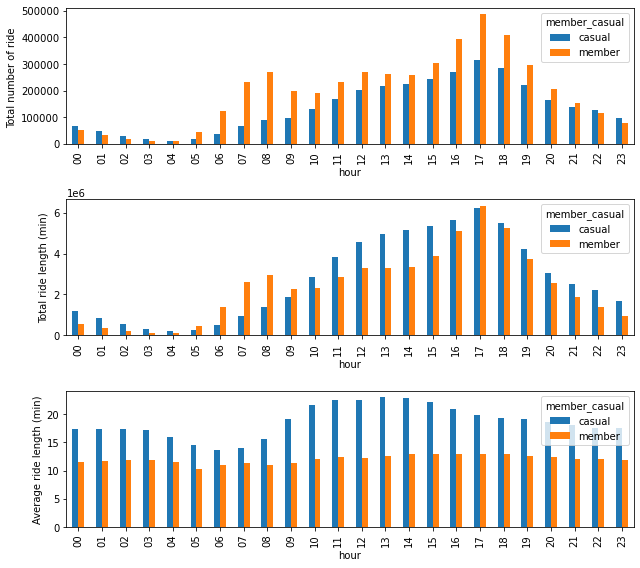

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ride_len_by_mem_per_hour2['count'].T.plot(kind='bar', ylabel='Total number of ride ', figsize= (9,8), ax = ax1)
ride_len_by_mem_per_hour2['sum'].T.plot(kind='bar', ylabel='Total ride length (min)', figsize= (9,8), ax = ax2)
ride_len_by_mem_per_hour2['mean'].T.plot(kind='bar', ylabel='Average ride length (min)', figsize= (9,8), ax = ax3)
fig.tight_layout()

#### Two peaks are seen for the members during the commute hours in the both total number and total ride length and a third weak one during the lunch time which is more obvious in the total ride numbers graph than the total ride length graph.

#### On the other hand, the peak of the number of rides and total ride length for asual users have a single peak which coincide with the second peak of the members (commute back to home).

#### Since there is a difference in the pattern of these two costumers, and we already know the distribution of these two groups between the days of the week are different, it would be beneficial to look at the hourly distribution of the ride data both for weekdays and weekends separately.

# Hourly distribution distinctly on weekends and weekdays
## weekdays

In [42]:
trips_wd = trips_2[(trips_2['day_of_the_week'] != 'Saturday') & (trips_2['day_of_the_week'] != 'Sunday')  ]
trips_wd.info()

ride_len_by_mem_per_hour_wd = pd.pivot_table(trips_wd,
              index = [ 'member_casual' ],
              values = 'ride_length',
              aggfunc = [np.sum, np.mean, 'count'],
              columns = ['hour'],
              margins = False,
              margins_name = 'Total Count')
ride_len_by_mem_per_hour_wd

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5418149 entries, 0 to 531631
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ride_id          object        
 1   rideable_type    category      
 2   member_casual    category      
 3   start_time       datetime64[ns]
 4   end_time         datetime64[ns]
 5   ride_length      int32         
 6   hour             category      
 7   day_of_the_week  category      
 8   month            category      
 9   year             category      
dtypes: category(6), datetime64[ns](2), int32(1), object(1)
memory usage: 217.0+ MB


sum                                                  \
hour               00      01      02      03     04      05       06   
member_casual                                                           
casual         499777  298333  179199  110170  97588  157881   375563   
member         256629  134522   74984   50069  90815  400147  1197235   

                                          ...   count                          \
hour                07       08       09  ...      14      15      16      17   
member_casual                             ...                                   
casual          699874   931369   996352  ...  116815  133407  165426  217890   
member         2325251  2503715  1509700  ...  165645  207397  301098  397268   

                                                             
hour               18      19      20      21     22     23  
member_casual                                                
casual         201660  154354  112727   94040  83479  59150  
member         327243  229729  156633  115584  84882  53946  

[2 rows x 72 columns]

## Weekdays

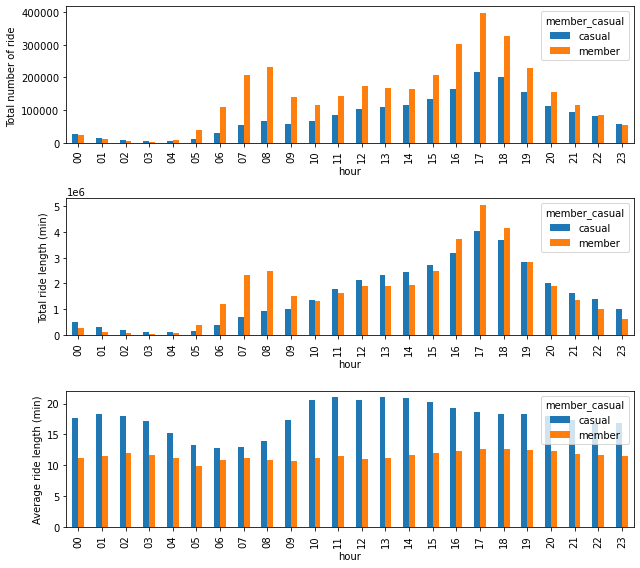

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ride_len_by_mem_per_hour_wd['count'].T.plot(kind='bar', ylabel='Total number of ride ', figsize= (9,8), ax = ax1)
ride_len_by_mem_per_hour_wd['sum'].T.plot(kind='bar', ylabel='Total ride length (min)', figsize= (9,8), ax = ax2)
ride_len_by_mem_per_hour_wd['mean'].T.plot(kind='bar', ylabel='Average ride length (min)', figsize= (9,8), ax = ax3)
fig.tight_layout()

#### As seen from the average ride length, it seems some of the casual users have ride the bikes for short trips in the early morning which can be interpreted as they ride bikes for commuting and not for recreation.

#### At most of the hours of a weekday except from 23:00 to 3:00 in the morning, total number of ride is dominated by members. Moreover, total ride duration is peaked at 17:00 which is while a peak for both users, it is dominated by members.

## Weekends

In [44]:
trips_we = trips_2[(trips_2['day_of_the_week'] == 'Saturday') | (trips_2['day_of_the_week'] == 'Sunday')  ]
trips_we.info()

ride_len_by_mem_per_hour_we = pd.pivot_table(trips_we,
              index = [ 'member_casual' ],
              values = 'ride_length',
              aggfunc = [np.sum, np.mean, 'count'],
              columns = ['hour'],
              margins = False,
              margins_name = 'Total Count')
ride_len_by_mem_per_hour_we

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2513213 entries, 16 to 531629
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ride_id          object        
 1   rideable_type    category      
 2   member_casual    category      
 3   start_time       datetime64[ns]
 4   end_time         datetime64[ns]
 5   ride_length      int32         
 6   hour             category      
 7   day_of_the_week  category      
 8   month            category      
 9   year             category      
dtypes: category(6), datetime64[ns](2), int32(1), object(1)
memory usage: 100.7+ MB


sum                                                        \
hour               00      01      02      03     04     05      06      07   
member_casual                                                                 
casual         697221  531176  357497  185746  99448  88587  122669  231680   
member         323655  241139  143046   79219  51573  73993  167756  296182   

                               ...   count                                \
hour               08      09  ...      14      15      16     17     18   
member_casual                  ...                                         
casual         461490  890090  ...  107370  108993  104603  96421  84263   
member         471712  737187  ...   93948   94233   93108  88940  80555   

                                                  
hour              19     20     21     22     23  
member_casual                                     
casual         67813  51040  44342  43529  37039  
member         65001  47448  37944  32347  25481  

[2 rows x 72 columns]

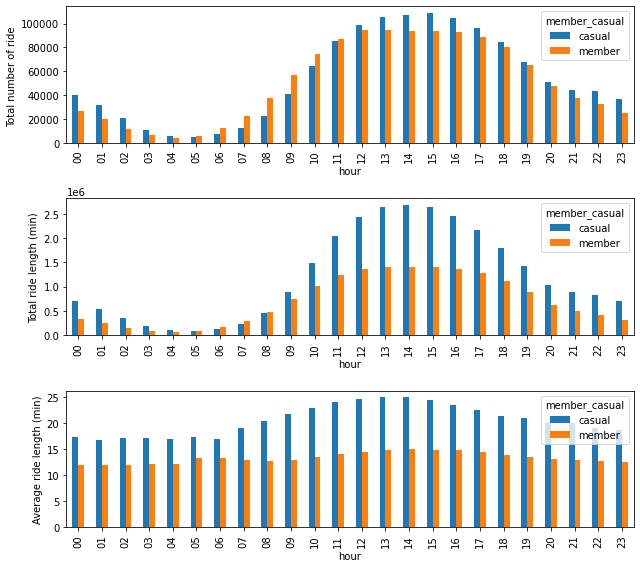

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

ride_len_by_mem_per_hour_we['count'].T.plot(kind='bar', ylabel='Total number of ride ', figsize= (9,8), ax = ax1)
ride_len_by_mem_per_hour_we['sum'].T.plot(kind='bar', ylabel='Total ride length (min)', figsize= (9,8), ax = ax2)
ride_len_by_mem_per_hour_we['mean'].T.plot(kind='bar', ylabel='Average ride length (min)', figsize= (9,8), ax = ax3)
fig.tight_layout()

#### During the weekends, the hourly distribution for both users are quite similar which is smoothly increasing until reach a peak at 14:00 for both users. The peak hours can be considered as between 12:00 up to 16:00.

#### On the weekends, total number of rides and peak total ride length is not dominated by members anymore.

# 6 - Act

Since the director of marketing believes the company’s future success depends on maximizing the number of annual memberships, we are interested in designing a new marketing strategy to convert casual riders into annual members. 

## Top three recommendations based on analysis

The following reccomendations aim to persuade the casual riders to buy annual membership at the first stage. Implementing these recommendations has also another advantage which is maximizing the utility of the available resoursces and maximizing the profit even if the costumer choose to not buy annual membership.

1- Promotions should target those casual users who seems to ride more often even during the weekdays and advertise the annual membership. More importantly promotions can target occasional riders on weekends to advertise about the annual or seasonal memberships. 

2- The price of the single-ride passes should be adjusted according to the higher average ride-length of the casual members. In other words, the single-ride pass can have higher price or even become unavailable at the times when there is a peak demand, such as between 12:00 to 16:00 on weekends and 16:00 to 18:00 on weekdays. This will help leveling off demand over the hours of the day and days of the week. Another perspective to this recommendation is offering discounted pricing during the non-peak times of the weekends and almost most of the week days.   

3- Similarly, the full-day passes should not be available during the weekends of the high season (June, July, Agust, September) for the same price as other seasons and other days of the high season, especially if it is before peak hours of the day (12:00 up to 16:00). If we are interested in making the annual membership more appealing, these daily passes should not be available during the weekends of high season or at least their price should be higher to maximize the profit. At these peak times, we can instead offer monthly or seasonal membership for higher prices.
